###### Data Source : https://www.kaggle.com/uciml/german-credit
### Load Libraries

In [32]:
import operator as op
import random
random.seed(123)

import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.cluster import KMeans
import sklearn.metrics as skm
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

import os
for dirname, _, filenames in os.walk('\Semester 6\SDR\Tubes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

\Semester 6\SDR\Tubes\german_credit_data.csv


### Import Data

In [48]:
df = pd.read_csv('\Semester 6\SDR\Tubes\german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [49]:
#Mengubah kolom 'unnamed:0' menjadi index (kolom paling kiri)
df = pd.read_csv('\Semester 6\SDR\Tubes\german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [42]:
#Menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [43]:
#Menampilkan jumlah data yang kosong
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### Feature Engeneering

In [50]:
# Imputing missing values
df.replace(['?', 'NaN', np.nan], -1, inplace=True) 
num_vars= ['Saving accounts', 'Checking account']
for i in num_vars:
    df[i] =  df[i].astype('category')
imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
df[num_vars] = imp.fit_transform(df[num_vars])

In [62]:
# Encoding
cat_vars = ['Sex', 'Job', 'Housing','Purpose', 'Saving accounts', 'Checking account']
for i in cat_vars:
    df[i+"_cat"] = df[i].astype('category').cat.codes
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_cat,Job_cat,Housing_cat,Purpose_cat,Saving accounts_cat,Checking account_cat
0,67,male,2,own,little,little,1169,6,radio/TV,1,2,1,5,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,2,1,5,0,1
2,49,male,1,own,little,little,2096,12,education,1,1,1,3,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,2,0,4,0,0
4,53,male,2,free,little,little,4870,24,car,1,2,0,1,0,0


### Exploratory Data Analysis
###### - Seperti apa hubungan antar variabel?

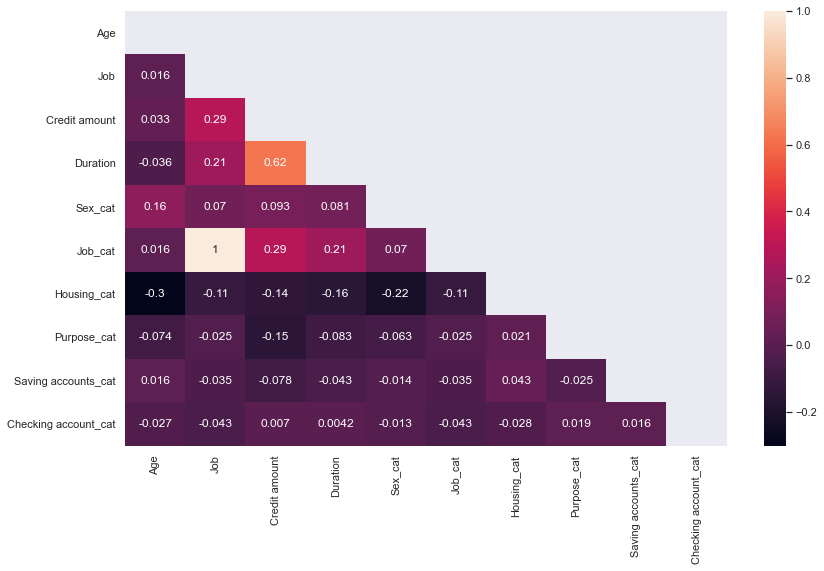

In [61]:
# Masking to show only one side of the matrix
corr = np.corrcoef(df.corr())                        
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Axtual Correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()


###### - Berdasarkan koefisien 0,62, bagaimana hubungan antara jumlah kredit dan durasi peminjaman?

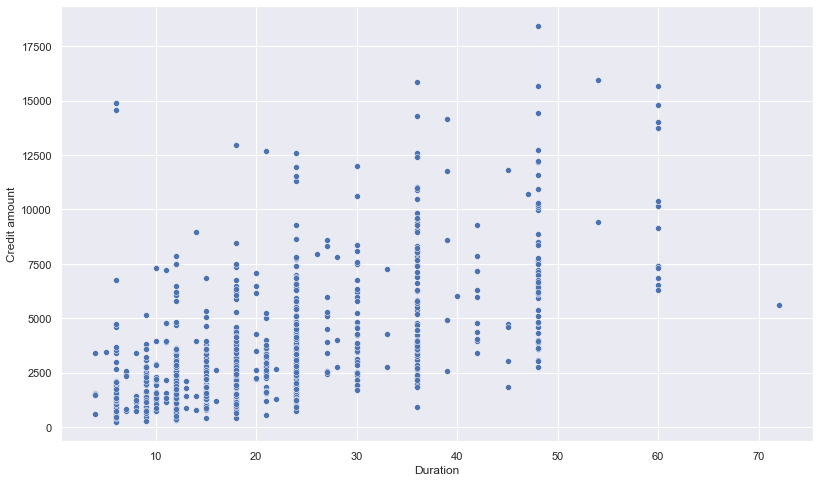

In [53]:
# Scatterplot based on the strongest relationship
sns.scatterplot(data=df, x='Duration', y='Credit amount')
plt.show()

###### - Apakah Usia memengaruhi jumlah kredit?

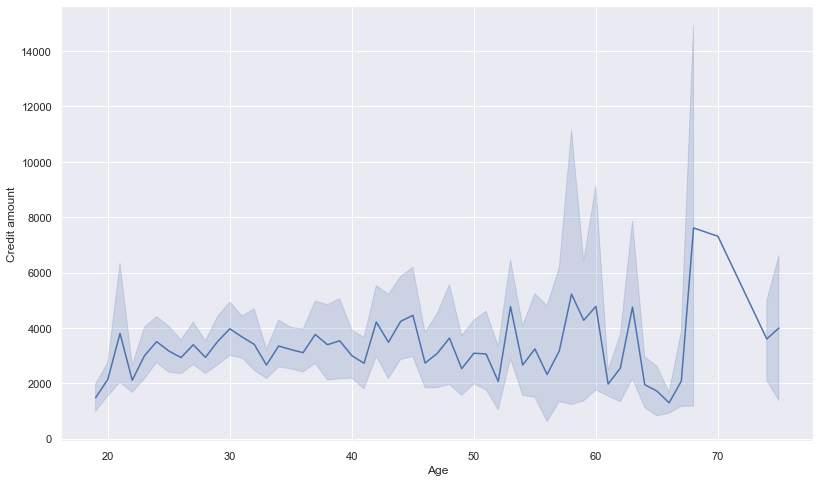

In [56]:
sns.lineplot(data=df, x='Age', y='Credit amount')
plt.show()

###### - Bagaimana demografi kreditor kita?

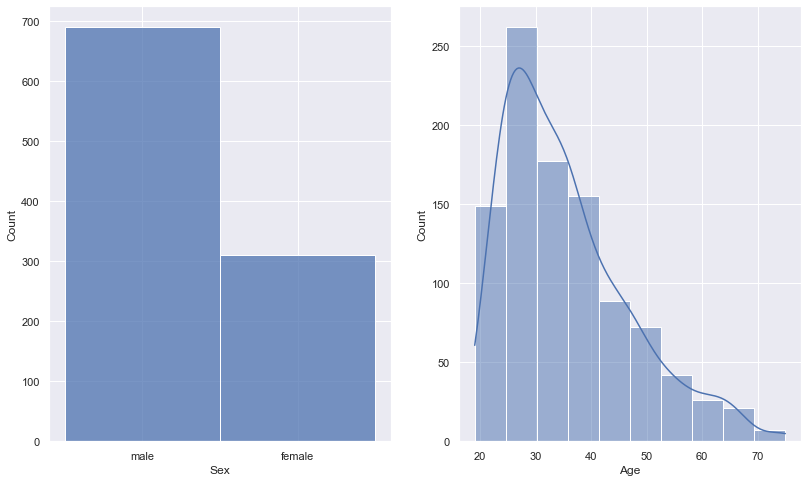

In [57]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2, hspace=0.2, wspace=0.2)
(ax1), (ax2) = gs.subplots(sharex=False, sharey=False)

sns.histplot(ax=ax1, data=df, x='Sex')
sns.histplot(ax=ax2, data=df, x='Age', bins=10, kde=True)
plt.show()

###### - Bagaimana jenis Pekerjaan memengaruhi Jumlah Kredit?

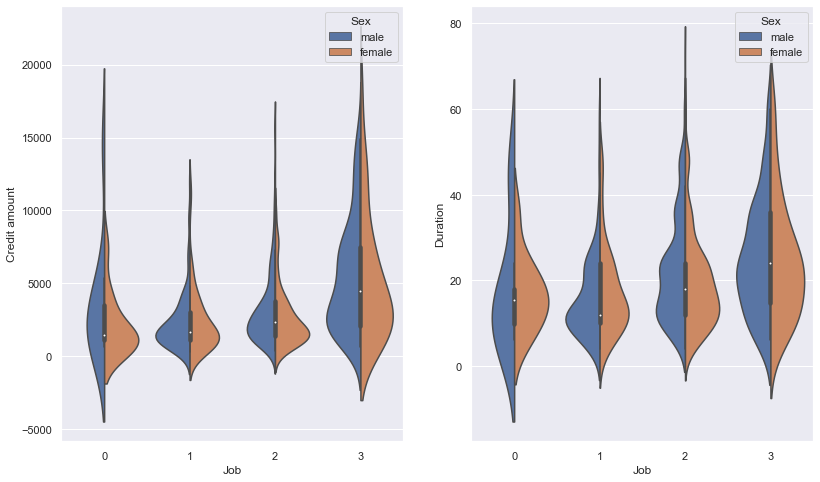

In [58]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2, hspace=0.2, wspace=0.2)
(ax1), (ax2) = gs.subplots(sharex='all', sharey=False)

sns.violinplot(ax=ax1, data=df, x='Job', y='Credit amount', 
               hue='Sex', split=True)

sns.violinplot(ax=ax2, data=df, x='Job', y='Duration',
              hue='Sex', split=True)

plt.show()

### Clustering

In [59]:
# Dictionary with models performance metrics
models = {}

###### - K-Means

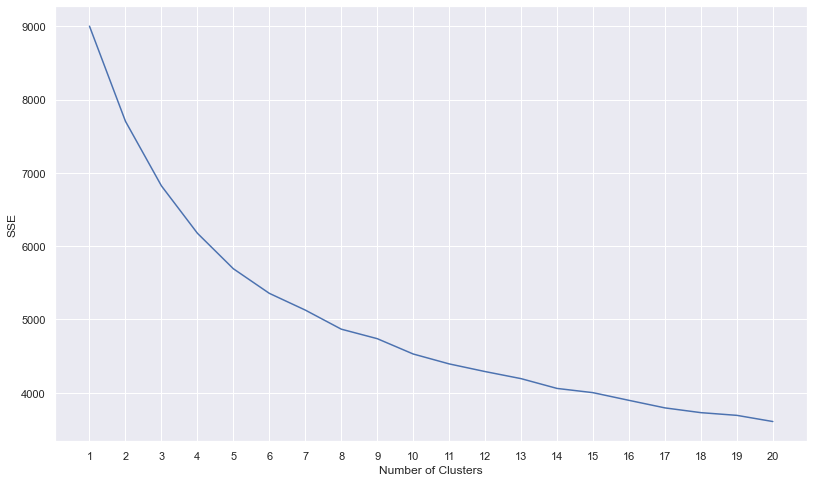

In [66]:
class kmeans():
    def __init__(self, df):
        self.df = df
        
    def pre_processing(self):
        
        X = self.df.drop(cat_vars, axis=1).values
        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(X)
        return self
        
    def fit_pred(self):
        kmeans_kwargs = {"init": "random",
                        "n_init": 10,
                        "max_iter": 100,
                        "random_state": 2,}
#         clf = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300)
#         clf.fit(self.X_scaled)
#         print(clf.inertia_)
#         print(clf.cluster_centers_)
#         print(clf.n_iter_)
        sse = []
        for k in range(1, 21):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(self.X_scaled)
            sse.append(kmeans.inertia_)
        sns.lineplot(x=range(1, 21), y=sse, markers=True)
        plt.xticks(range(1, 21))
        plt.xlabel("Number of Clusters")
        plt.ylabel("SSE")
        plt.show()

#         pred = clf.predict(self.X_test)
#         print(pred)

model = kmeans(df).pre_processing()
model.fit_pred()